In [1]:
# pip install wfdb

In [2]:
import wfdb
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#print('Current directory is: {}'.format(os.getcwd()))

Current directory is: C:\Users\masud\Desktop\Github_Bachelor_Project\wfdb-python


In [6]:
records = []
properties = []
annot = []
AnnSymb = []
AnnSamp = []
AnnRhythm = []
Rpeak_Samp = []
Rpeak_Symb = []
for f in glob.glob('C:/Users/masud/Desktop/Github_Bachelor_Project/wfdb-python/data/*.dat'): ##### change the path (afib) to your own directory. The rest should 
                                                                                             ##### remin the same
    sig, fields = wfdb.rdsamp(f[:-4])  #### In this function, you have the opportunity to pass 
                                       #### "channels=[0]" or "channels=[1]" to select channel 1 or 2.
    ann = wfdb.rdann(f[:-4], 'atr')
    QRS = wfdb.rdann(f[:-4], 'qrs')
    Symb = pd.Series(ann.symbol)
    Samp = pd.Series(ann.sample)
    QRS_Symb = pd.Series(QRS.symbol)
    QRS_Samp = pd.Series(QRS.sample)
    Rhythm = pd.Series(ann.aux_note)
    records.append(sig)
    properties.append(fields)
    annot.append(ann)
    AnnSymb.append(Symb)
    AnnSamp.append(Samp)
    Rpeak_Symb.append(QRS_Symb)
    Rpeak_Samp.append(QRS_Samp)
    AnnRhythm.append(Rhythm)
    
AnnSymb = pd.Series(AnnSymb).values
AnnSamp = pd.Series(AnnSamp).values

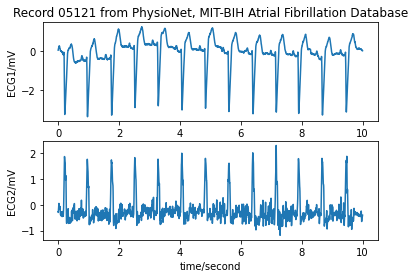

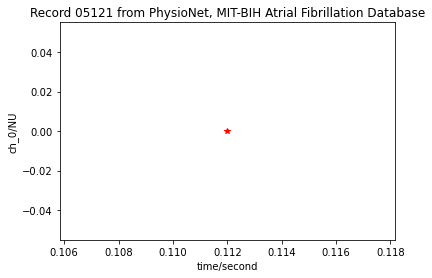

{'record_name': '05121',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2500,
 'base_time': datetime.time(16, 0),
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[ 0.045, -0.275],
        [ 0.07 , -0.3  ],
        [ 0.1  , -0.235],
        ...,
        [ 0.045, -0.435],
        [ 0.02 , -0.45 ],
        [ 0.015, -0.405]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['05121.dat', '05121.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [9, -55],
 'checksum': [20236, 26140],
 'block_size': [0, 0]}

In [43]:
record = wfdb.rdrecord('C:/Users/masud/Desktop/Github_Bachelor_Project/wfdb-python/data/05121', sampto=2500)
ann = wfdb.rdann('C:/Users/masud/Desktop/Github_Bachelor_Project/wfdb-python/data/05121', 'atr', sampto=2500)
wfdb.plot_wfdb(record=record, title='Record 05121 from PhysioNet, MIT-BIH Atrial Fibrillation Database', time_units='seconds') 
wfdb.plot_wfdb(annotation=ann, title='Record 05121 from PhysioNet, MIT-BIH Atrial Fibrillation Database', time_units='seconds')
display(record.__dict__)

In [37]:
# plt.plot("What to plot HERE")
# plt.show()

In [71]:
#R_values = plt.plot(AnnSymp)

In [72]:
AnnSymb

array([0     +
1     +
2     +
3     +
4     +
5     +
6     +
7     +
8     +
9     +
10    +
11    +
12    +
13    +
14    +
dtype: object,
       0      +
1      +
2      +
3      +
4      +
      ..
161    +
162    +
163    +
164    +
165    +
Length: 166, dtype: object,
       0     +
1     +
2     +
3     +
4     +
5     +
6     +
7     +
8     +
9     +
10    +
11    +
12    +
13    +
14    +
dtype: object,
       0     +
1     +
2     +
3     +
4     +
5     +
6     +
7     +
8     +
9     +
10    +
11    +
12    +
13    +
14    +
dtype: object,
       0     +
1     +
2     +
3     +
4     +
5     +
6     +
7     +
8     +
9     +
10    +
dtype: object,
       0     +
1     +
2     +
3     +
4     +
5     +
6     +
7     +
8     +
9     +
10    +
11    +
12    +
13    +
14    +
15    +
16    +
dtype: object,
       0     +
1     +
2     +
3     +
4     +
     ..
68    +
69    +
70    +
71    +
72    +
Length: 73, dtype: object,
       0     +
1     +
2     +
3     +
4     +
5  

In [78]:
AnnSamp

array([0          30
1      102584
2      119604
3      121773
4      122194
5      133348
6      166857
7     1096245
8     1098054
9     1135296
10    1139595
11    1422436
12    1423548
13    1459277
14    1460416
dtype: int32,
       0           68
1       266498
2       376328
3      2585284
4      2602516
        ...   
161    8884575
162    8910970
163    8921519
164    8952011
165    8981286
Length: 166, dtype: int32,
       0         176
1      556677
2      580971
3      716110
4      724076
5     2148473
6     2153997
7     2998791
8     3003178
9     3638922
10    3677438
11    4157977
12    4162994
13    7681741
14    7686231
dtype: int32,
       0         154
1       11388
2      138152
3      171592
4      191328
5      252786
6      322908
7      748262
8      847441
9     7832273
10    7836542
11    8273014
12    8291855
13    8307657
14    8313239
dtype: int32,
       0          62
1     1097510
2     1098684
3     2284261
4     2285672
5     2319586
6     2326154
7  